# Analisando o bot

Este jupyter-notebook vai auxiliar na análise de um RASA bot.

## Instalação

### Configurando jupyter

In [1]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))

### Instalação do Rasa


Verificando versões:

In [2]:
import rasa_nlu
import spacy

print("rasa_nlu: {}".format(rasa_nlu.__version__))
print("Loading spaCy language model...")
print(spacy.load("pt")("Olá Mundo!"))

rasa_nlu: 0.13.7
Loading spaCy language model...
Olá Mundo!


### Treinando o modelo do Rasa NLU

Na celula abaixo todas as intents na pasta `../data/intents/` serão utilizadas para gerar os gráficos de avaliação do bot.

Ela irá treinar o modelo e executar a avaliação que pode ser verificada na saída da célula abaixo.

## Treinar e executar matriz de confuzão do 0

INFO:rasa_nlu.training_data.loading:Training data format of ../bot/data/intents/geral.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 120 (6 distinct intents)
	- Found intents: 'negar', 'afirmar_projeto', 'afirmar_curiosidades', 'cumprimentar', 'afirmar', 'o_que_eh'
	- entity examples: 0 (0 distinct entities)
	- found entities: 

INFO:rasa_nlu.training_data.loading:Training data format of ../bot/data/intents/curiosidades.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 356 (18 distinct intents)
	- Found intents: 'curiosidades_valor_maximo_pessoa_fisica', 'curiosidades_receber_incetivo_de_parentes', 'curiosidades_captacao_de_recursos', 'curiosidades_comprovacao_experiencia', 'curiosidades_remuneracao_proponente', 'curiosidades_lei_rouanet_elegibilidade', 'curiosidades_elegibilidade_de_empresa_para_beneficios', 'curiosidades_quantidade_projetos', 'curiosidades_valor_maximo_projeto', 'curiosidades_ben

INFO:rasa_nlu.evaluate:No prediction errors were found. You are AWESOME!
INFO:rasa_nlu.evaluate:Confusion matrix, without normalization: 
[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20

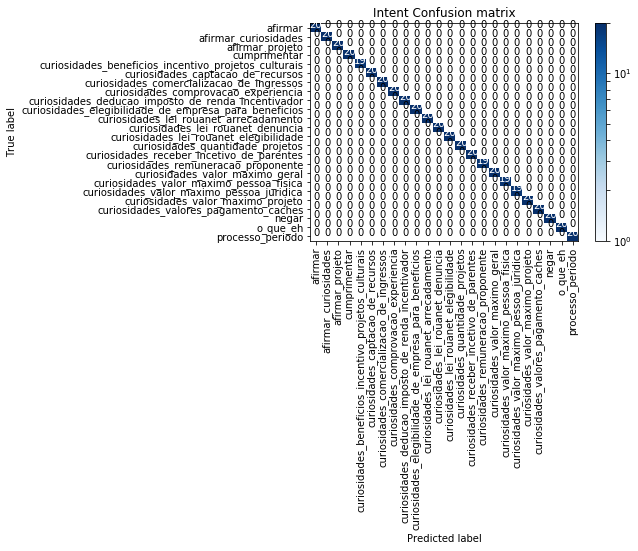

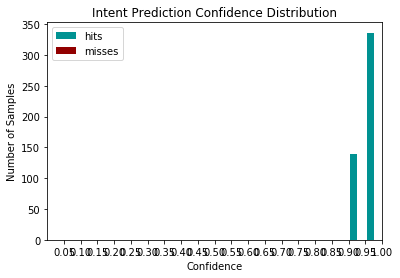

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  1.0
INFO:rasa_nlu.evaluate:Precision: 1.0
INFO:rasa_nlu.evaluate:Accuracy:  1.0
INFO:rasa_nlu.evaluate:Classification report: 
              precision    recall  f1-score   support

   no_entity       1.00      1.00      1.00      1873

   micro avg       1.00      1.00      1.00      1873
   macro avg       1.00      1.00      1.00      1873
weighted avg       1.00      1.00      1.00      1873



In [3]:
import os

from rasa_nlu.training_data import load_data
from rasa_nlu.model import Trainer
from rasa_nlu import config


intents_directory = '../bot/data/intents/'

intents = {}

for intent_file in os.listdir(intents_directory):
    intent_file_path = os.path.join(intents_directory, intent_file)

    intents[intent_file] = {}

    intent_list = []
    intent_name = None

    with open(intent_file_path) as f:
        lines = f.readlines()

        for line in lines:
            line = line.strip()

            if line.startswith('##'):
                if intent_name is not None:
                    intents[intent_file][intent_name] = intent_list
                intent_name = line.replace('## intent:', '') 
                intent_list = []

            elif line.startswith('- '):
                intent_list.append(line.replace('- ', ''))


# loading the nlu training samples
training_data = load_data(intents_directory)

# trainer to educate our pipeline
trainer = Trainer(config.load("../bot/nlu_config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

from rasa_nlu.evaluate import run_evaluation
run_evaluation('../bot/data/intents/', model_directory)

## Gerar matriz de confuzão utilizando modelo treinado pelo bot

INFO:tensorflow:Restoring parameters from /work/bot/models/nlu/current/intent_classifier_tensorflow_embedding.ckpt
INFO:rasa_nlu.training_data.loading:Training data format of ../bot/data/intents/geral.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 120 (6 distinct intents)
	- Found intents: 'negar', 'afirmar_projeto', 'afirmar_curiosidades', 'cumprimentar', 'afirmar', 'o_que_eh'
	- entity examples: 0 (0 distinct entities)
	- found entities: 

INFO:rasa_nlu.training_data.loading:Training data format of ../bot/data/intents/curiosidades.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 356 (18 distinct intents)
	- Found intents: 'curiosidades_valor_maximo_pessoa_fisica', 'curiosidades_receber_incetivo_de_parentes', 'curiosidades_captacao_de_recursos', 'curiosidades_comprovacao_experiencia', 'curiosidades_remuneracao_proponente', 'curiosidades_lei_rouanet_elegibilidade', 'curiosidades_elegibilidade_de_e

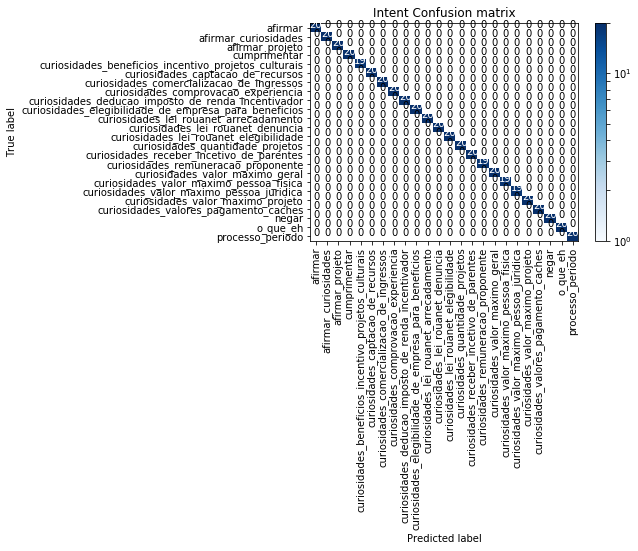

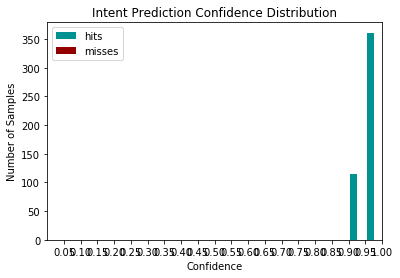

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  1.0
INFO:rasa_nlu.evaluate:Precision: 1.0
INFO:rasa_nlu.evaluate:Accuracy:  1.0
INFO:rasa_nlu.evaluate:Classification report: 
              precision    recall  f1-score   support

   no_entity       1.00      1.00      1.00      1873

   micro avg       1.00      1.00      1.00      1873
   macro avg       1.00      1.00      1.00      1873
weighted avg       1.00      1.00      1.00      1873



In [4]:
from rasa_nlu.evaluate import run_evaluation
run_evaluation('../bot/data/intents/', '/work/bot/models/nlu/current')

### Avaliação do modelo de NLU treinado

`Caso queira testar mensagens específicas mande a mensagem na célula seguinte`

Quando quiser parar o teste diga **pare**

In [5]:
pprint(interpreter.parse('Quanto posso pagar para artistas?'))

{
  "intent": {
    "name": "curiosidades_lei_rouanet_arrecadamento",
    "confidence": 0.7391868829727173
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "curiosidades_lei_rouanet_arrecadamento",
      "confidence": 0.7391868829727173
    },
    {
      "name": "curiosidades_valores_pagamento_caches",
      "confidence": 0.6019294261932373
    },
    {
      "name": "curiosidades_lei_rouanet_elegibilidade",
      "confidence": 0.1382823884487152
    },
    {
      "name": "o_que_eh",
      "confidence": 0.130439892411232
    },
    {
      "name": "curiosidades_remuneracao_proponente",
      "confidence": 0.10553553700447083
    },
    {
      "name": "curiosidades_captacao_de_recursos",
      "confidence": 0.08683095872402191
    },
    {
      "name": "negar",
      "confidence": 0.08648846298456192
    },
    {
      "name": "curiosidades_quantidade_projetos",
      "confidence": 0.0763925313949585
    },
    {
      "name": "curiosidades_valor_maximo_pessoa_juridi